Práctica de Machine Learning - MATIAS CAVALLO - Predicción del precio de alojamientos de Airbnb.

Voy a hacer un análisis exploratorio del dataset de Airbnb para predecir precios de alojamientos.

In [38]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



Carga de datos y exploración inicial

In [39]:
airbnb_data = pd.read_csv('airbnb-listings-extract.csv', sep=';', low_memory=False)

print(f'Dimensiones del dataset: {airbnb_data.shape}')


Dimensiones del dataset: (14780, 89)


In [40]:
# Como en el curso de SQL, mejor ver algunas filas para entender mejor la logica del dataset
airbnb_data.head(5).T


,0,1,2,3,4
ID,11210388,17471131,17584891,5398030,18104606
Listing Url,https://www.airbnb.com/rooms/11210388,https://www.airbnb.com/rooms/17471131,https://www.airbnb.com/rooms/17584891,https://www.airbnb.com/rooms/5398030,https://www.airbnb.com/rooms/18104606
Scrape ID,20170306202425,20170407214050,20170407214050,20170407214050,20170407214050
Last Scraped,2017-03-07,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,The Loft-Full Bath-Deck w/View,"Claris I, Friendly Rentals","Style Terrace Red, Friendly Rentals",Picasso Suite 1.4 Paseo de Gracia,Smart City Centre Apartment II
...,...,...,...,...,...
Cancellation Policy,moderate,super_strict_30,super_strict_30,strict,flexible
Calculated host listings count,1.0,106.0,106.0,24.0,92.0
Reviews per Month,3.5,0.86,NaN,1.09,NaN
Geolocation,"30.3373609355,-97.8632766782","41.3896829422,2.17262543017","41.3930345489,2.16217327868","41.3969668101,2.1674178103","41.3886851936,2.15514963616"


Como el dataset tiene muchas columnas me enfoco en seleccionar las variables que tienen sentido para predecir el precio. 

In [41]:

columnas_interes= [
    'Property Type',      
    'Room Type',          
    'Accommodates',        
    'Bathrooms',          
    'Bedrooms',           
    'Beds',               
    'Bed Type',          
    'Price',              
    'Guests Included',    
    'Extra People',       
    'Minimum Nights',     
    'Number of Reviews', 
    'Review Scores Rating',        
    'Review Scores Cleanliness',   
    'Review Scores Checkin',       
    'Review Scores Communication', 
    'Review Scores Location',      
    'Review Scores Value',        
    'Cancellation Policy', 
    'City'                
]

# nuevo dataframe con estas columnas
airbnb_data = airbnb_data[columnas_interes].copy()
print('Nuevo dataset:', airbnb_data.shape)
airbnb_data.head()


Nuevo dataset: (14780, 20)


,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,City
0,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,58.0,1,0,2,42,98.0,10.0,10.0,10.0,10.0,10.0,moderate,Austin
1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,70.0,2,44,1,1,80.0,10.0,10.0,10.0,8.0,10.0,super_strict_30,Barcelona
2,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,70.0,2,42,1,0,NaN,NaN,NaN,NaN,NaN,NaN,super_strict_30,Barcelona
3,Apartment,Entire home/apt,8,2.0,3.0,4.0,Real Bed,229.0,2,39,2,13,92.0,9.0,10.0,10.0,10.0,9.0,strict,Barcelona
4,Apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,149.0,1,0,2,0,NaN,NaN,NaN,NaN,NaN,NaN,flexible,Barcelona


División train/test

Como indica el notebook 3.1 de la ayuda para la practica, hay que tener mucho cuidado con el data leakage. Por eso divido inmediatamente después de seleccionar las columnas relevantes, ANTES de cualquier preprocesamiento y no despues.


In [42]:
from sklearn.model_selection import train_test_split

# División train/test ANTES de cualquier preprocesamiento
airbnb_train, airbnb_test = train_test_split(airbnb_data, test_size=0.2, random_state=42, shuffle=True)

print(f'Dimensiones del dataset de training: {airbnb_train.shape}')
print(f'Dimensiones del dataset de test: {airbnb_test.shape}')

# Guardamos
airbnb_train.to_csv('airbnb_train.csv', sep=';', decimal='.', index=False)
airbnb_test.to_csv('airbnb_test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos unicamente con él.

airbnb_train = pd.read_csv('airbnb_train.csv', sep=';', decimal='.')

print(f'\n✓ Dataset de train cargado y que hay que usar: {airbnb_train.shape}')
airbnb_train.head(5).T


Dimensiones del dataset de training: (11824, 20)
Dimensiones del dataset de test: (2956, 20)

✓ Dataset de train cargado y que hay que usar: (11824, 20)


,0,1,2,3,4
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment
Room Type,Private room,Entire home/apt,Private room,Shared room,Entire home/apt
Accommodates,2,4,2,1,2
Bathrooms,4.0,1.0,1.0,2.0,1.0
Bedrooms,1.0,1.0,1.0,1.0,1.0
Beds,1.0,2.0,1.0,1.0,2.0
Bed Type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
Price,20.0,86.0,66.0,30.0,100.0
Guests Included,1,2,1,1,1
Extra People,5,5,0,0,0


Limpieza de datos


In [43]:
# Primero vemos si hay valores nulos o missing
print("Valores nulos por columna (train):")
print(airbnb_train.isnull().sum())

print("\nPorcentaje de nulos (train):")
porcentaje_nulos = (airbnb_train.isnull().sum() / len(airbnb_train)) * 100
print(porcentaje_nulos.round(2))


Valores nulos por columna (train):
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                        46
Bedrooms                         19
Beds                             36
Bed Type                          0
Price                            12
Guests Included                   0
Extra People                      0
Minimum Nights                    0
Number of Reviews                 0
Review Scores Rating           2655
Review Scores Cleanliness      2670
Review Scores Checkin          2682
Review Scores Communication    2668
Review Scores Location         2685
Review Scores Value            2685
Cancellation Policy               0
City                              6
dtype: int64

Porcentaje de nulos (train):
Property Type                   0.00
Room Type                       0.00
Accommodates                    0.00
Bathrooms                       0.39
Bedrooms                        0.16
Beds             

In [44]:
# Veo que price y extra people vienen como string, y necesito convertirlos a números para poder trabajar. Además, eliminamos las filas donde Price es nulo o cero

def limpiar_precio(precio):
    if pd.isna(precio):
        return np.nan
    
    precio_limpio = str(precio).replace('$', '').replace(',', '')
    try:
        return float(precio_limpio)
    except:
        return np.nan

airbnb_train['Price'] = airbnb_train['Price'].apply(limpiar_precio)
airbnb_train['Extra People'] = airbnb_train['Extra People'].apply(limpiar_precio)

airbnb_train = airbnb_train[airbnb_train['Price'].notna()]
airbnb_train = airbnb_train[airbnb_train['Price'] > 0]


print(f'Dataset train después de limpiar precios: {airbnb_train.shape}')


Dataset train después de limpiar precios: (11812, 20)


In [45]:
# Tengo que arreglar los valores nulos.
# IMPORTANTE: Calculo estadísticas SOLO en train y las guardo para aplicarlas después a test

# Para variables numéricas uso la mediana DE TRAIN
bathrooms_median = airbnb_train['Bathrooms'].median()
bedrooms_median = airbnb_train['Bedrooms'].median()
beds_median = airbnb_train['Beds'].median()

airbnb_train['Bathrooms'].fillna(bathrooms_median, inplace=True)
airbnb_train['Bedrooms'].fillna(bedrooms_median, inplace=True)
airbnb_train['Beds'].fillna(beds_median, inplace=True)

# Para las puntuaciones de reviews, uso la media DE TRAIN
rating_mean = airbnb_train['Review Scores Rating'].mean()
cleanliness_mean = airbnb_train['Review Scores Cleanliness'].mean()
checkin_mean = airbnb_train['Review Scores Checkin'].mean()
communication_mean = airbnb_train['Review Scores Communication'].mean()
location_mean = airbnb_train['Review Scores Location'].mean()
value_mean = airbnb_train['Review Scores Value'].mean()

airbnb_train['Review Scores Rating'].fillna(rating_mean, inplace=True)
airbnb_train['Review Scores Cleanliness'].fillna(cleanliness_mean, inplace=True)
airbnb_train['Review Scores Checkin'].fillna(checkin_mean, inplace=True)
airbnb_train['Review Scores Communication'].fillna(communication_mean, inplace=True)
airbnb_train['Review Scores Location'].fillna(location_mean, inplace=True)
airbnb_train['Review Scores Value'].fillna(value_mean, inplace=True)

# Para variables categóricas (texto), uso la moda DE TRAIN
property_mode = airbnb_train['Property Type'].mode()[0]
room_mode = airbnb_train['Room Type'].mode()[0]
bed_mode = airbnb_train['Bed Type'].mode()[0]
cancel_mode = airbnb_train['Cancellation Policy'].mode()[0]
city_mode = airbnb_train['City'].mode()[0]

airbnb_train['Property Type'].fillna(property_mode, inplace=True)
airbnb_train['Room Type'].fillna(room_mode, inplace=True)
airbnb_train['Bed Type'].fillna(bed_mode, inplace=True)
airbnb_train['Cancellation Policy'].fillna(cancel_mode, inplace=True)
airbnb_train['City'].fillna(city_mode, inplace=True)

# Verifico que ya no haya nulos
print("Valores nulos después de la limpieza train:")
print(airbnb_train.isnull().sum())



Valores nulos después de la limpieza train:
Property Type                  0
Room Type                      0
Accommodates                   0
Bathrooms                      0
Bedrooms                       0
Beds                           0
Bed Type                       0
Price                          0
Guests Included                0
Extra People                   0
Minimum Nights                 0
Number of Reviews              0
Review Scores Rating           0
Review Scores Cleanliness      0
Review Scores Checkin          0
Review Scores Communication    0
Review Scores Location         0
Review Scores Value            0
Cancellation Policy            0
City                           0
dtype: int64


Análisis Exploratorio


In [46]:
# Estadísticas descriptivas para hacerme una idea de los datos
airbnb_train.describe()


,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value
count,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000
mean,3.261514,1.278488,1.339909,2.035642,73.633678,1.584829,7.620555,3.093549,22.481036,91.683108,9.327577,9.619022,9.645503,9.532625,9.211955
std,2.085611,0.650587,0.898463,1.607124,72.260255,1.164703,11.927331,13.474346,37.729252,7.957797,0.871823,0.704426,0.677043,0.683253,0.842808
min,1.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,1.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,34.000000,1.000000,0.000000,1.000000,1.000000,90.000000,9.000000,9.619022,9.645503,9.000000,9.000000
50%,3.000000,1.000000,1.000000,2.000000,55.000000,1.000000,0.000000,2.000000,7.000000,91.683108,9.327577,10.000000,10.000000,10.000000,9.211955
75%,4.000000,1.000000,2.000000,2.000000,87.000000,2.000000,15.000000,3.000000,27.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,16.000000,8.000000,10.000000,16.000000,999.000000,16.000000,276.000000,1125.000000,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000


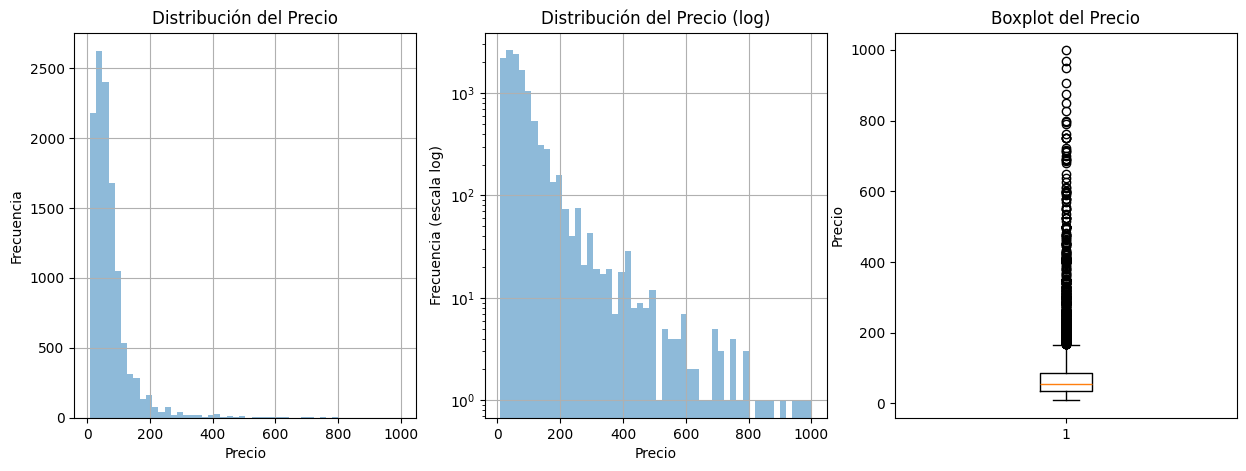

In [47]:
# Visualizo la distribución del precio y configuro un histograma normal

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
airbnb_train['Price'].plot.hist(alpha=0.5, bins=50, grid=True)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución del Precio')

# Histograma con escala logarítmica para ver mejor los outliers
plt.subplot(1, 3, 2)
airbnb_train['Price'].plot.hist(alpha=0.5, bins=50, grid=True)
plt.yscale('log')
plt.xlabel('Precio')
plt.ylabel('Frecuencia (escala log)')
plt.title('Distribución del Precio (log)')

# Boxplot para ver outliers
plt.subplot(1, 3, 3)
plt.boxplot(airbnb_train['Price'])
plt.ylabel('Precio')
plt.title('Boxplot del Precio')

plt.show()


In [48]:
# Veo que hay outliers extremos en los precios, elimino los que están por encima del 99%, solo tendré 1 % de datos perdidos
# IMPORTANTE: Calculo el percentil SOLO en train y lo guardo para aplicarlo después a test

percentil_99 = airbnb_train['Price'].quantile(0.99)
print(f'Percentil 99 del precio (calculado en train): {percentil_99}')

# Filtro solo train por ahora
airbnb_train_clean = airbnb_train[airbnb_train['Price'] <= percentil_99].copy()

print(f'\nRegistros eliminados de train: {len(airbnb_train) - len(airbnb_train_clean)}')
print(f'Dataset train final: {airbnb_train_clean.shape}')


Percentil 99 del precio (calculado en train): 404.0

Registros eliminados de train: 117
Dataset train final: (11695, 20)


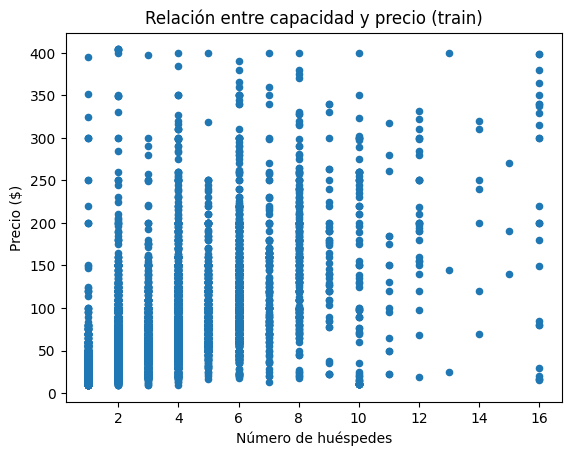

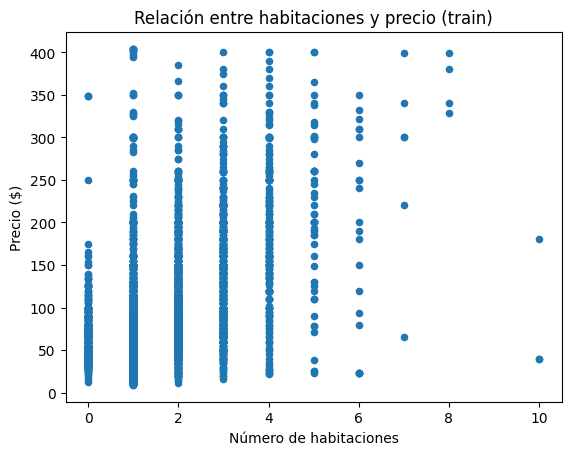

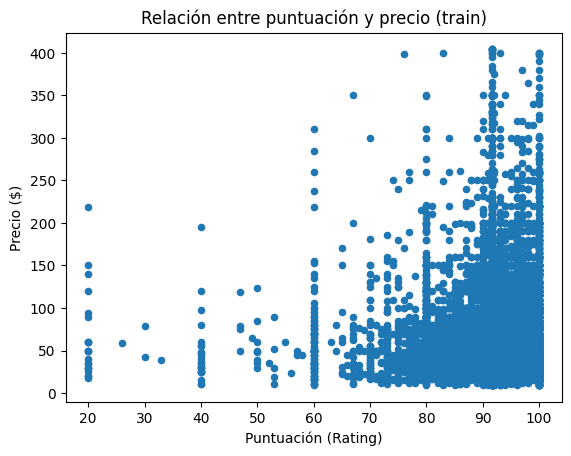

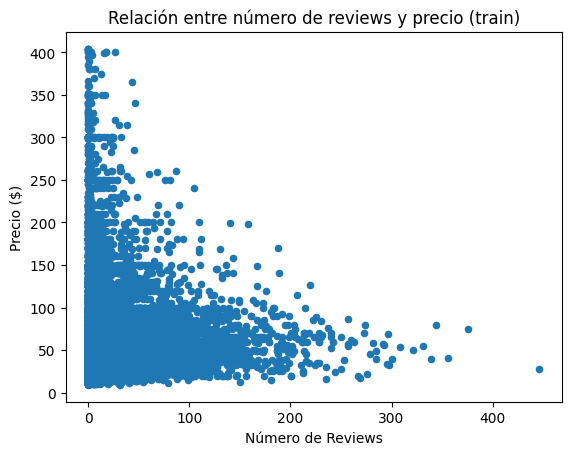

In [49]:
# Ahora hago scatter plots para ver cómo se relacionan las variables con el precio, me baso en el ejemplo de King County


# Accommodates vs Price
airbnb_train_clean.plot(kind='scatter', x='Accommodates', y='Price')
plt.xlabel('Número de huéspedes')
plt.ylabel('Precio ($)')
plt.title('Relación entre capacidad y precio (train)')
plt.show()

# Bedrooms vs Price
airbnb_train_clean.plot(kind='scatter', x='Bedrooms', y='Price')
plt.xlabel('Número de habitaciones')
plt.ylabel('Precio ($)')
plt.title('Relación entre habitaciones y precio (train)')
plt.show()

# Review Score vs Price
airbnb_train_clean.plot(kind='scatter', x='Review Scores Rating', y='Price')
plt.xlabel('Puntuación (Rating)')
plt.ylabel('Precio ($)')
plt.title('Relación entre puntuación y precio (train)')
plt.show()

# Number of Reviews vs Price
airbnb_train_clean.plot(kind='scatter', x='Number of Reviews', y='Price')
plt.xlabel('Número de Reviews')
plt.ylabel('Precio ($)')
plt.title('Relación entre número de reviews y precio (train)')
plt.show()


Preparación de datos para modelado


In [50]:
# Las variables string las convierto a números, uso Label Encoding
# IMPORTANTE: Entreno los encoders SOLO con train, los aplicaremos a test más adelante

from sklearn.preprocessing import LabelEncoder

# Hago copia para no modificar el original
data_modelo_train = airbnb_train_clean.copy()

# Lista de variables string
categoricas = ['Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy', 'City']

# Diccionario para guardar los encoders (los necesitaremos para test)
label_encoders = {}

# Codifico cada columna
for col in categoricas:
    le = LabelEncoder()
    # Entreno el encoder SOLO con train
    le.fit(data_modelo_train[col].astype(str))
    
    # Transformo train
    data_modelo_train[col] = le.transform(data_modelo_train[col].astype(str))
    
    # Guardo el encoder para aplicarlo después a test
    label_encoders[col] = le

print("Variables categóricas de TRAIN codificadas a números")
print(f"Train shape: {data_modelo_train.shape}")
data_modelo_train.head()


Variables categóricas de TRAIN codificadas a números
Train shape: (11695, 20)


,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,City
0,0,1,2,4.0,1.0,1.0,4,20.0,1,5.0,10,1,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4,96
1,0,0,4,1.0,1.0,2.0,4,86.0,2,5.0,1,0,91.683108,9.327577,9.619022,9.645503,9.532625,9.211955,4,96
2,0,1,2,1.0,1.0,1.0,4,66.0,1,0.0,3,0,91.683108,9.327577,9.619022,9.645503,9.532625,9.211955,0,13
3,0,2,1,2.0,1.0,1.0,4,30.0,1,0.0,7,0,91.683108,9.327577,9.619022,9.645503,9.532625,9.211955,4,96
4,0,0,2,1.0,1.0,2.0,4,100.0,1,0.0,4,14,92.000000,9.000000,10.000000,10.000000,10.000000,9.000000,4,167


In [51]:
# Ahora veo el mapeo de string a número para entender la lógica

print("=" * 60)
print("MAPEO DE CATEGORÍAS (String → Número) - train")
print("=" * 60)

# Uso los encoders ya entrenados
for col in categoricas:
    print(f"\n{col}:")
    le = label_encoders[col]
    for i, clase in enumerate(le.classes_):
        print(f"  {i} = {clase}")


MAPEO DE CATEGORÍAS (String → Número) - train

Property Type:
  0 = Apartment
  1 = Bed & Breakfast
  2 = Boat
  3 = Boutique hotel
  4 = Bungalow
  5 = Camper/RV
  6 = Casa particular
  7 = Chalet
  8 = Condominium
  9 = Dorm
  10 = Earth House
  11 = Guest suite
  12 = Guesthouse
  13 = Hostel
  14 = House
  15 = Loft
  16 = Other
  17 = Serviced apartment
  18 = Tent
  19 = Timeshare
  20 = Townhouse
  21 = Villa

Room Type:
  0 = Entire home/apt
  1 = Private room
  2 = Shared room

Bed Type:
  0 = Airbed
  1 = Couch
  2 = Futon
  3 = Pull-out Sofa
  4 = Real Bed

Cancellation Policy:
  0 = flexible
  1 = flexible_new
  2 = moderate
  3 = moderate_new
  4 = strict
  5 = strict_new
  6 = super_strict_30
  7 = super_strict_60

City:
  0 = Alaró
  1 = Alcudia
  2 = Alcúdia
  3 = Algaida
  4 = Amsterdam
  5 = Antwerpen
  6 = Aravaca (Madrid)
  7 = Athens
  8 = Athina
  9 = Austin
  10 = Balearic Islands
  11 = Ballsbridge
  12 = Barcelona
  13 = Berlin
  14 = Berlín
  15 = Betlem
  16 

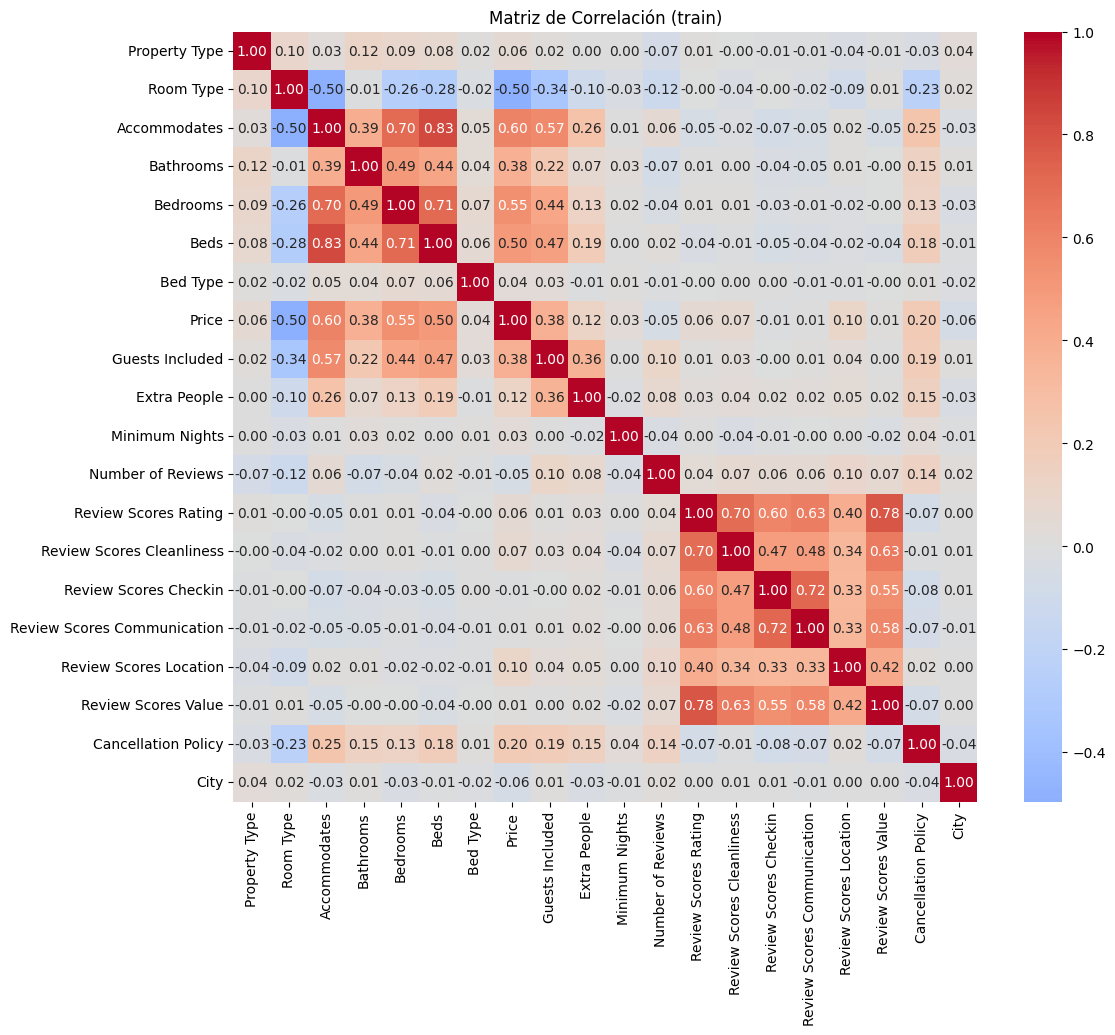


Correlación de cada variable con el Precio (ordenado) - train:
Price                          1.000000
Accommodates                   0.603013
Bedrooms                       0.549923
Beds                           0.495929
Bathrooms                      0.377846
Guests Included                0.376565
Cancellation Policy            0.196644
Extra People                   0.123224
Review Scores Location         0.104759
Review Scores Cleanliness      0.070689
Review Scores Rating           0.057928
Property Type                  0.057678
Bed Type                       0.040118
Minimum Nights                 0.030717
Review Scores Value            0.014817
Review Scores Communication    0.006029
Review Scores Checkin         -0.009042
Number of Reviews             -0.051366
City                          -0.056121
Room Type                     -0.495965
Name: Price, dtype: float64


In [52]:
# Ahora veo la correlación entre variables 

import seaborn as sns

# Calculo la matriz de correlación y visualizo con un heatmap
corr_matrix = data_modelo_train.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Matriz de Correlación (train)')
plt.show()

# Veo qué variables están más correlacionadas con el precio
print("\nCorrelación de cada variable con el Precio (ordenado) - train:")
print(corr_matrix['Price'].sort_values(ascending=False))


Preparación del conjunto de test

Ahora que tenemos todo el preprocesamiento hecho en train, cargamos el conjunto de test y aplicamos las mismas transformaciones usando los parámetros calculados en train.


In [53]:
# Cargamos el conjunto de test que guardamos al principio
airbnb_test = pd.read_csv('airbnb_test.csv', sep=';', decimal='.')

print(f'Test cargado: {airbnb_test.shape}')

# Limpiamos precios 
airbnb_test['Price'] = airbnb_test['Price'].apply(limpiar_precio)
airbnb_test['Extra People'] = airbnb_test['Extra People'].apply(limpiar_precio)

airbnb_test = airbnb_test[airbnb_test['Price'].notna()]
airbnb_test = airbnb_test[airbnb_test['Price'] > 0]

print(f'Test después de limpiar precios: {airbnb_test.shape}')

# Imputamos valores nulos con las estadísticas calculadas en train
airbnb_test['Bathrooms'].fillna(bathrooms_median, inplace=True)
airbnb_test['Bedrooms'].fillna(bedrooms_median, inplace=True)
airbnb_test['Beds'].fillna(beds_median, inplace=True)

airbnb_test['Review Scores Rating'].fillna(rating_mean, inplace=True)
airbnb_test['Review Scores Cleanliness'].fillna(cleanliness_mean, inplace=True)
airbnb_test['Review Scores Checkin'].fillna(checkin_mean, inplace=True)
airbnb_test['Review Scores Communication'].fillna(communication_mean, inplace=True)
airbnb_test['Review Scores Location'].fillna(location_mean, inplace=True)
airbnb_test['Review Scores Value'].fillna(value_mean, inplace=True)

airbnb_test['Property Type'].fillna(property_mode, inplace=True)
airbnb_test['Room Type'].fillna(room_mode, inplace=True)
airbnb_test['Bed Type'].fillna(bed_mode, inplace=True)
airbnb_test['Cancellation Policy'].fillna(cancel_mode, inplace=True)
airbnb_test['City'].fillna(city_mode, inplace=True)

print(f'Nulos en test después de imputación: {airbnb_test.isnull().sum().sum()}')

# Eliminamos outliers con el percentil calculado en train
airbnb_test_clean = airbnb_test[airbnb_test['Price'] <= percentil_99].copy()

print(f'Test después de eliminar outliers: {airbnb_test_clean.shape}')

# Encoding: aplicamos los encoders entrenados en train
data_modelo_test = airbnb_test_clean.copy()

for col in categoricas:
    le = label_encoders[col]
    test_categories = data_modelo_test[col].astype(str)
    
    # Verifico categorías nuevas
    nuevas_categorias = set(test_categories.unique()) - set(le.classes_)
    if nuevas_categorias:
        print(f"ADVERTENCIA: {col} tiene {len(nuevas_categorias)} categorías nuevas en test: {nuevas_categorias}")
        # Mapeo categorías conocidas y nuevas a 0
        test_encoded = test_categories.map(lambda x: le.transform([x])[0] if x in le.classes_ else 0)
        data_modelo_test[col] = test_encoded
    else:
        data_modelo_test[col] = le.transform(test_categories)

print(f'\n✓ Test completamente preprocesado: {data_modelo_test.shape}')
print(f'✓ Train preprocesado: {data_modelo_train.shape}')
data_modelo_test.head()


Test cargado: (2956, 20)
Test después de limpiar precios: (2951, 20)
Nulos en test después de imputación: 0
Test después de eliminar outliers: (2919, 20)
ADVERTENCIA: City tiene 26 categorías nuevas en test: {'París', 'Footscray', 'Kimmage', 'Bondi Junction', 'Lloret de Vistalegre', 'Cala Anguila-Cala Mendia', 'Colonia Sant Pere', 'Madri', 'Aravaca', 'Rosebery', 'Coogee', 'Cologny', 'Málaga', 'Cala Pi', 'Montreal', 'Ventas', 'Sa Garriga', 'Sint-Gillis', 'Port de Pollença', 'Chueca, Madrid', 'El Toro', 'Madrid, Vallecas (Fontarrón)', 'Ariany', 'Bronx', 'Sa Colònia', 'Long Beach'}

✓ Test completamente preprocesado: (2919, 20)
✓ Train preprocesado: (11695, 20)


,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,City
0,0,0,2,1.0,1.0,1.0,4,70.0,2,12.0,2,17,93.0,10.0,10.0,10.0,10.0,9.0,0,96
1,8,0,5,2.0,2.0,3.0,4,130.0,1,0.0,2,23,85.0,8.0,10.0,10.0,9.0,9.0,0,96
2,0,0,4,2.0,2.0,3.0,4,180.0,1,0.0,3,2,100.0,10.0,10.0,10.0,10.0,10.0,4,96
3,0,0,4,1.0,2.0,3.0,4,67.0,2,12.0,2,67,90.0,9.0,9.0,9.0,10.0,9.0,2,96
4,0,0,4,1.0,1.0,2.0,4,55.0,2,5.0,1,20,89.0,10.0,9.0,10.0,9.0,9.0,2,96



Ya tenemos train y test preprocesados. Ahora separamos X e y, y normalizamos.


In [54]:
# ya tenemos los datos divididos en train/test desde el inicio
# Ahora solo separo las características (X) de la variable objetivo (y)

X_train = data_modelo_train.drop('Price', axis=1)  
y_train = data_modelo_train['Price']

X_test = data_modelo_test.drop('Price', axis=1)  
y_test = data_modelo_test['Price']

print(f'datos de entrenamiento: {X_train.shape}')
print(f'datos de test: {X_test.shape}')

# normalizo los datos 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)      # aprendo de train
X_test_scaled = scaler.transform(X_test)            # aplico lo mismo a test

print("datos normalizados (media=0, std=1)")


datos de entrenamiento: (11695, 19)
datos de test: (2919, 19)
datos normalizados (media=0, std=1)


Modelado

Probamos diferentes modelos, de mas simple a más complejo:
- Regresión Lineal
- Lasso
- Árbol de Decisión  
- Random Forest


In [55]:
# REGRESIÓN LINEAL
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creo y entreno el modelo
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Hago predicciones
y_train_pred_lr = lr.predict(X_train_scaled)
y_test_pred_lr = lr.predict(X_test_scaled)

# Calculo las métricas
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
rmse_train_lr = np.sqrt(mse_train_lr)
rmse_test_lr = np.sqrt(mse_test_lr)
r2_train_lr = r2_score(y_train, y_train_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

print("=" * 50)
print("REGRESIÓN LINEAL")
print("=" * 50)
print("TRAIN:")
print("  MSE:", mse_train_lr)
print("  RMSE:", rmse_train_lr)
print("  R2:", r2_train_lr)
print("\nTEST:")
print("  MSE:", mse_test_lr)
print("  RMSE:", rmse_test_lr)
print("  R2:", r2_test_lr)


REGRESIÓN LINEAL
TRAIN:
  MSE: 1397.5178527319572
  RMSE: 37.38339006473272
  R2: 0.505857034166926

TEST:
  MSE: 1304.4375251028948
  RMSE: 36.116997731025414
  R2: 0.5126091713587926


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................alpha=0.018329807108324356; total time=   0.0s
[CV] END .........................alpha=0.018329807108324356; total time=   0.0s
[CV] END .........................alpha=0.018329807108324356; total time=   0.0s
[CV] END ..........................alpha=0.03359818286283781; total time=   0.0s
[CV] END ..........................alpha=0.03359818286283781; total time=   0.0s
[CV] END ..........................alpha=0.03359818286283781; total time=   0.0s
[CV] END ..........................alpha=0.06158482110660264; total time=   0.0s
[CV] END ..........................alpha=0.06158482110660264; total time=   0.0s
[CV] END ..........................alpha=0.06158

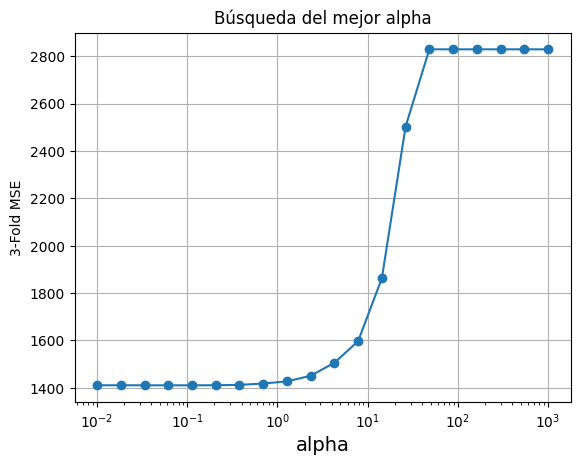

LASSO
TRAIN:
  MSE: 1397.9916502487479
  RMSE: 37.389726533484406
  R2: 0.5056895059241249

TEST:
  MSE: 1303.8314961074088
  RMSE: 36.108606953293126
  R2: 0.5128356084005108


In [56]:
# LASSO  - basicamente regresión con regularización
# Uso GridSearchCV para encontrar el mejor valor de alpha

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Defino el rango de alphas a probar 
alpha_vector = np.logspace(-2, 3, 20)
param_grid = {'alpha': alpha_vector}

# GridSearchCV con 3-Fold Cross Validation
grid = GridSearchCV(Lasso(max_iter=10000), 
                    param_grid=param_grid, 
                    cv=3, 
                    scoring='neg_mean_squared_error',
                    verbose=2)

grid.fit(X_train_scaled, y_train)

print("Mejor alpha encontrado:", grid.best_params_)
print("Mejor score (MSE):", grid.best_score_)

# Visualizo cómo varía el error con alpha. uso menos uno -1 porque está negado
scores = -1 * grid.cv_results_['mean_test_score']  
plt.semilogx(alpha_vector, scores, '-o')
plt.xlabel('alpha', fontsize=14)
plt.ylabel('3-Fold MSE')
plt.title('Búsqueda del mejor alpha')
plt.grid(True)
plt.show()

# Ahora evalúo el modelo Lasso con el mejor alpha
alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha=alpha_optimo, max_iter=10000)
lasso.fit(X_train_scaled, y_train)

# Predicciones
y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

# Métricas
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
rmse_train_lasso = np.sqrt(mse_train_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

print("=" * 50)
print("LASSO")
print("=" * 50)
print("TRAIN:")
print("  MSE:", mse_train_lasso)
print("  RMSE:", rmse_train_lasso)
print("  R2:", r2_train_lasso)
print("\nTEST:")
print("  MSE:", mse_test_lasso)
print("  RMSE:", rmse_test_lasso)
print("  R2:", r2_test_lasso)


In [57]:
# ÁRBOL DE DECISIÓN
# Uso max_depth para controlar la complejidad y evitar overfitting
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10, random_state=42)
tree.fit(X_train, y_train)  

# Predicciones
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

# Métricas
mse_train_tree = mean_squared_error(y_train, y_train_pred_tree)
mse_test_tree = mean_squared_error(y_test, y_test_pred_tree)
rmse_train_tree = np.sqrt(mse_train_tree)
rmse_test_tree = np.sqrt(mse_test_tree)
r2_train_tree = r2_score(y_train, y_train_pred_tree)
r2_test_tree = r2_score(y_test, y_test_pred_tree)

print("=" * 50)
print(" ÁRBOL DE DECISIÓN")
print("=" * 50)
print("TRAIN:")
print("  MSE:", mse_train_tree)
print("  RMSE:", rmse_train_tree)
print("  R2:", r2_train_tree)
print("\nTEST:")
print("  MSE:", mse_test_tree)
print("  RMSE:", rmse_test_tree)
print("  R2:", r2_test_tree)


 ÁRBOL DE DECISIÓN
TRAIN:
  MSE: 667.5635691843346
  RMSE: 25.837251579537917
  R2: 0.7639587635220508

TEST:
  MSE: 1214.0269694473848
  RMSE: 34.842889797595504
  R2: 0.5463902262509195


In [58]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

# Creo el Random Forest
# n_estimators = número de árboles
# max_depth = profundidad máxima de cada árbol
rf = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predicciones
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Métricas
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print("=" * 50)
print(" RANDOM FOREST")
print("=" * 50)
print("TRAIN:")
print("  MSE:", mse_train_rf)
print("  RMSE:", rmse_train_rf)
print("  R2:", r2_train_rf)
print("\nTEST:")
print("  MSE:", mse_test_rf)
print("  RMSE:", rmse_test_rf)
print("  R2:", r2_test_rf)


 RANDOM FOREST
TRAIN:
  MSE: 347.95457269530704
  RMSE: 18.653540486870234
  R2: 0.876968080092343

TEST:
  MSE: 956.2788888973516
  RMSE: 30.923759294389672
  R2: 0.6426953755144321


Importancia de cada variable:
                        Feature  Importance
4                      Bedrooms    0.325773
3                     Bathrooms    0.161816
1                     Room Type    0.112608
18                         City    0.080126
8                  Extra People    0.045997
9                Minimum Nights    0.043397
2                  Accommodates    0.041662
10            Number of Reviews    0.040945
5                          Beds    0.023636
11         Review Scores Rating    0.022472
17          Cancellation Policy    0.019676
15       Review Scores Location    0.019034
7               Guests Included    0.018408
0                 Property Type    0.011772
12    Review Scores Cleanliness    0.009191
16          Review Scores Value    0.008546
14  Review Scores Communication    0.007141
13        Review Scores Checkin    0.005873
6                      Bed Type    0.001926


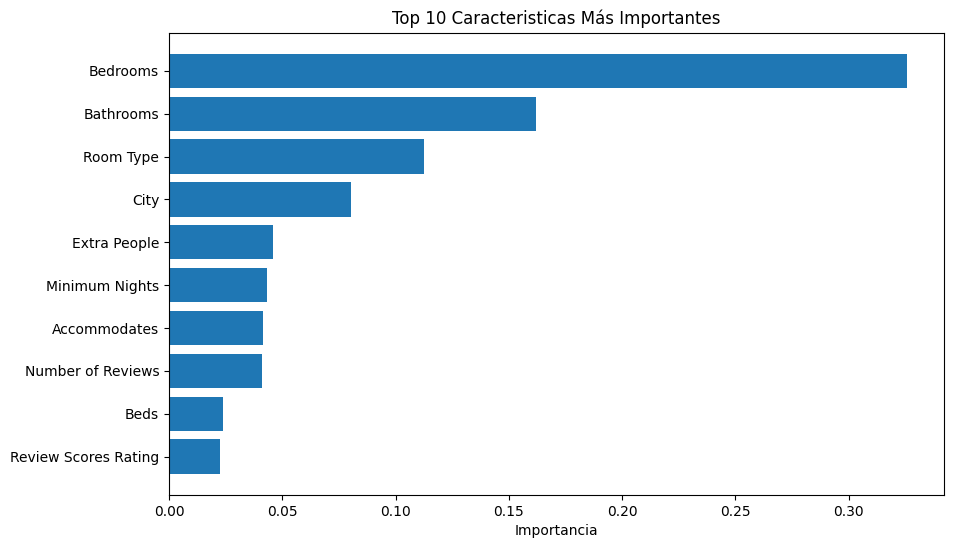

In [59]:
# Random Forest me permite ver qué variables son más importantes


feature_names = X_train.columns
importancias = rf.feature_importances_

# las ordeno via DF 
df_importancias = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importancias
})
df_importancias = df_importancias.sort_values('Importance', ascending=False)

print("Importancia de cada variable:")
print(df_importancias)

# Visualizo las top 10
plt.figure(figsize=(10, 6))
top_10 = df_importancias.head(10)
plt.barh(top_10['Feature'], top_10['Importance'])
plt.xlabel('Importancia')
plt.title('Top 10 Caracteristicas Más Importantes')
plt.gca().invert_yaxis()  
plt.show()


Comparación de modelos


In [60]:
# Ahora comparo todos los modelos para ver cuál es mejor

print("\n" + "=" * 70)
print("COMPARACIÓN DE TODOS LOS MODELOS")
print("=" * 70)
print()

# Tabla resumen
print("Modelo                  | RMSE Train | RMSE Test  | R2 Test")
print("-" * 70)
print("1. Regresión Lineal     |  {:.2f}  |  {:.2f}  | {:.4f}".format(rmse_train_lr, rmse_test_lr, r2_test_lr))
print("2. Lasso                |  {:.2f}  |  {:.2f}  | {:.4f}".format(rmse_train_lasso, rmse_test_lasso, r2_test_lasso))
print("3. Árbol de Decisión    |  {:.2f}  |  {:.2f}  | {:.4f}".format(rmse_train_tree, rmse_test_tree, r2_test_tree))
print("4. Random Forest        |  {:.2f}  |  {:.2f}  | {:.4f}".format(rmse_train_rf, rmse_test_rf, r2_test_rf))
print("=" * 70)



COMPARACIÓN DE TODOS LOS MODELOS

Modelo                  | RMSE Train | RMSE Test  | R2 Test
----------------------------------------------------------------------
1. Regresión Lineal     |  37.38  |  36.12  | 0.5126
2. Lasso                |  37.39  |  36.11  | 0.5128
3. Árbol de Decisión    |  25.84  |  34.84  | 0.5464
4. Random Forest        |  18.65  |  30.92  | 0.6427


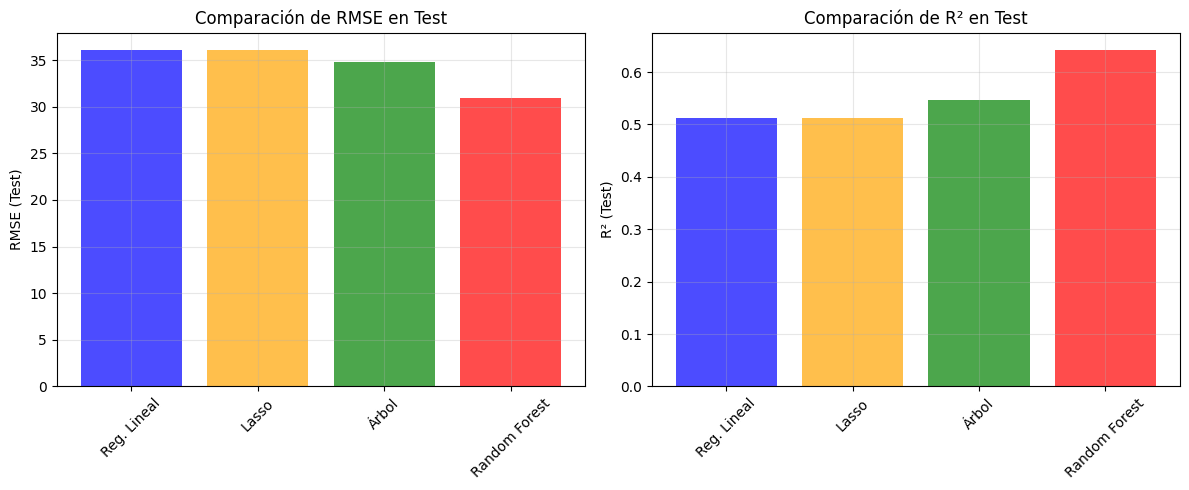

In [61]:
# Visualizo la comparación con un gráfico de barras
modelos = ['Reg. Lineal', 'Lasso', 'Árbol', 'Random Forest']
rmse_test_vals = [rmse_test_lr, rmse_test_lasso, rmse_test_tree, rmse_test_rf]
r2_test_vals = [r2_test_lr, r2_test_lasso, r2_test_tree, r2_test_rf]

plt.figure(figsize=(12, 5))

# Gráfico de RMSE
plt.subplot(1, 2, 1)
plt.bar(modelos, rmse_test_vals, color=['blue', 'orange', 'green', 'red'], alpha=0.7)
plt.ylabel('RMSE (Test)')
plt.title('Comparación de RMSE en Test')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Gráfico de R2
plt.subplot(1, 2, 2)
plt.bar(modelos, r2_test_vals, color=['blue', 'orange', 'green', 'red'], alpha=0.7)
plt.ylabel('R² (Test)')
plt.title('Comparación de R² en Test')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
